In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\admin\Desktop\mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [4]:
df.drop(['model'],axis=1,inplace=True)

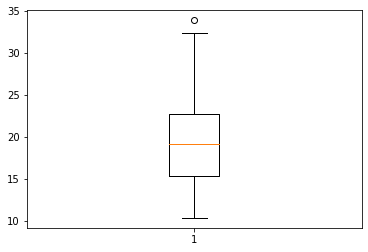

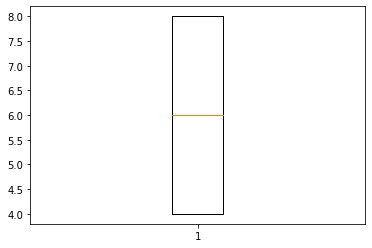

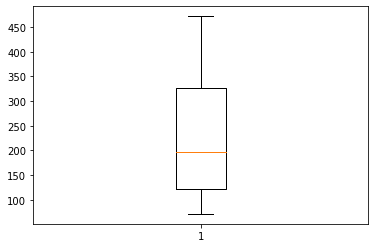

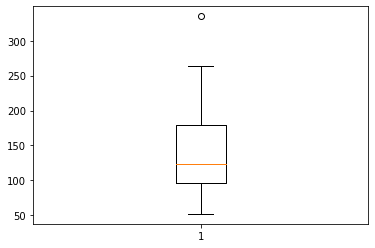

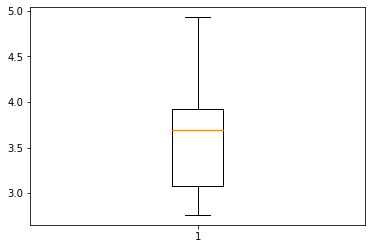

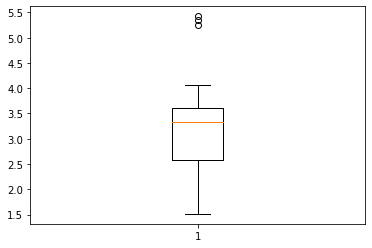

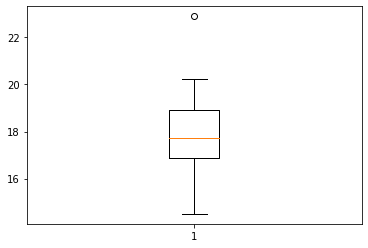

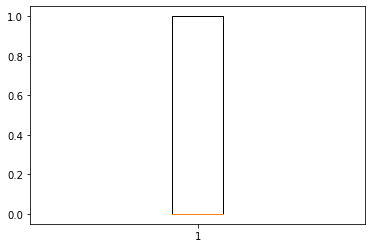

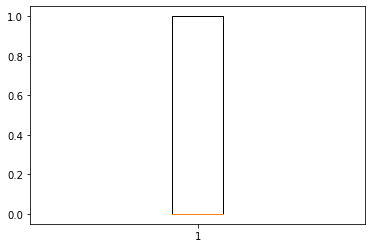

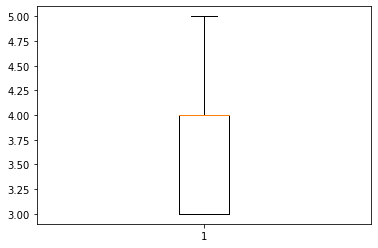

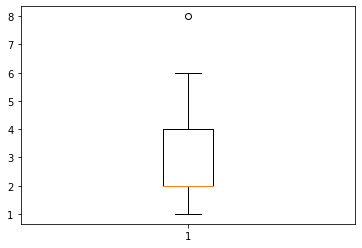

In [5]:
for i in df:
    plt.boxplot(df[i])
    plt.show()

In [6]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [7]:
x = df.drop(['hp'],axis=1)
y = df['hp']

In [8]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ x',data=df).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     19.50
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           1.90e-08
Time:                        21:25:46   Log-Likelihood:                -142.89
No. Observations:                  32   AIC:                             307.8
Df Residuals:                      21   BIC:                             323.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.0484    184.504      0.428      0.673    -304.649     462.746
x[0]          -2.0631      2.091     -0.987      0.335      -6.411       2.285
x[1]           8.2037     10.086      0.813      0.425     -12.772      29.179
x[2]           0.4390      0.149      2.942      0.008       0.129       0.749
x[3]          -4.6185     16.083     -0.287      0.777     -38.065      28.828
x[4]         -27.6600     19.270     -1.435      0.166     -67.735      12.415
x[5]          -1.7844      7.364     -0.242      0.811     -17.098      13.530
x[6]          25.8129     19.851      1.300      0.208     -15.470      67.096
x[7]           9.4863     20.760      0.457      0.652     -33.686      52.659
x[8]           7.2164     14.616      0.494      0.627     -23.179      37.612
x[9]          18.7487      7.029      2.667      0.014       4.132      33.366
==============================================================================
Omnibus:                        7.395   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                2.162
Skew:                          -0.102   Prob(JB):                        0.339
Kurtosis:                       1.743   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
a=(x.shape,x_train.shape,x_test.shape)
a

((32, 10), (22, 10), (10, 10))

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [13]:
from sklearn.metrics import r2_score,mean_absolute_error
from math import sqrt

In [14]:
b=(r2_score(y_test,model.predict(x_test)))
b

0.6939104809927759

In [15]:
c=(r2_score(y_train,model.predict(x_train)))
c

0.9229689982746181

In [16]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [17]:
rd = Ridge(alpha=23)
rd.fit(x_train,y_train)

Ridge(alpha=23)

In [18]:
d=(r2_score(y_test,rd.predict(x_test)))
d

0.7544447369714559

In [19]:
e=(r2_score(y_train,rd.predict(x_train)))
e

0.8877673496881915

In [20]:
el = ElasticNet(alpha=0.05)
el.fit(x_train,y_train)

ElasticNet(alpha=0.05)

In [21]:
f=(r2_score(y_test,el.predict(x_test)))
f

0.7632311992506264

In [22]:
g=(r2_score(y_train,el.predict(x_train)))
g

0.9189068862917266